In [30]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from neurodsp.plts.time_series import plot_time_series

from ecephys.plot import plot_hypnogram_overlay
from ecephys.scoring import load_visbrain_hypnogram
from ecephys.sglx_utils import load_timeseries
from ecephys.signal.ripples import get_epoched_ripple_density
from ecephys.signal.timefrequency import get_bandpower, parallel_spectrogram_welch

In [49]:
hypno_paths = {
    "SR": {
        "Segundo": Path(
            "/Volumes/neuropixel/Data/CNPIX2-Segundo/1-21-2020_g0_t23.hypnogram.txt"
        ),
        "Valentino": Path(
            "/Volumes/neuropixel/Data/CNPIX3-Valentino/2-20-2020_g0_t3.hypnogram.txt"
        ),
        "Doppio": Path(
            "/Volumes/neuropixel/Data/CNPIX4-Doppio/3-18-2020_g0_t3.hypnogram.txt"
        ),
        "Alessandro": Path(
            "/Volumes/neuropixel/Data/CNPIX5-Alessandro/8-25-2020_g0_t2.hypnogram.txt"
        ),
        "Eugene": Path(
            "/Volumes/neuropixel/Data/CNPIX6-Eugene/9.24.2020_SR_24hs_g0_t0.hypnogram.txt"
        ),
    },
    "BL": {
        "Segundo": Path(
            "/Volumes/neuropixel/Data/CNPIX2-Segundo/1-21-2020_g0_t11.hypnogram.txt"
        ),
        "Valentino": Path(
            "/Volumes/neuropixel/Data/CNPIX3-Valentino/2-19-2020_g1_t3.hypnogram.txt"
        ),
        "Doppio": Path(
            "/Volumes/neuropixel/Data/CNPIX4-Doppio/3-17-2020_g0_t3.hypnogram.txt"
        ),
        "Alessandro": Path(
            "/Volumes/neuropixel/Data/CNPIX5-Alessandro/8-24-2020_g0_t6.hypnogram.txt"
        ),
        "Eugene": Path(
            "/Volumes/neuropixel/Data/CNPIX6-Eugene/9.24.2020_BL_24hs2_g0_t5.hypnogram.txt"
        ),
    }
}
hypnogram = load_visbrain_hypnogram(hypno_paths["SR"]["Doppio"])

In [71]:
ripples = pd.read_csv(Path('/Volumes/neuropixel/Data/CNPIX4-Doppio/3-18-2020_g0_t3.all_ripples.csv'))

In [72]:
epochs = get_epoched_ripple_density(np.min(hypnogram.start_time), np.max(hypnogram.end_time), ripples.center_time / 1000, epoch_length=10)

In [23]:
bin_path = Path('/Volumes/neuropixel/Data/CNPIX4-Doppio/3-18-2020_g0_t3.imec0.lf.bin')
chans = [374, 377, 378, 381, 382]
(times, sig, fs) = load_timeseries(bin_path, chans, start_time=None, end_time=None)

nChan: 385, nFileSamp: 18000019


In [64]:
freqs, spg_times, spg = parallel_spectrogram_welch(sig, fs, nperseg = 2 ** 15)
spg = np.median(spg, axis=-1)

In [69]:
swa = get_bandpower(freqs, spg_times, spg, f_range=(0.5, 4))

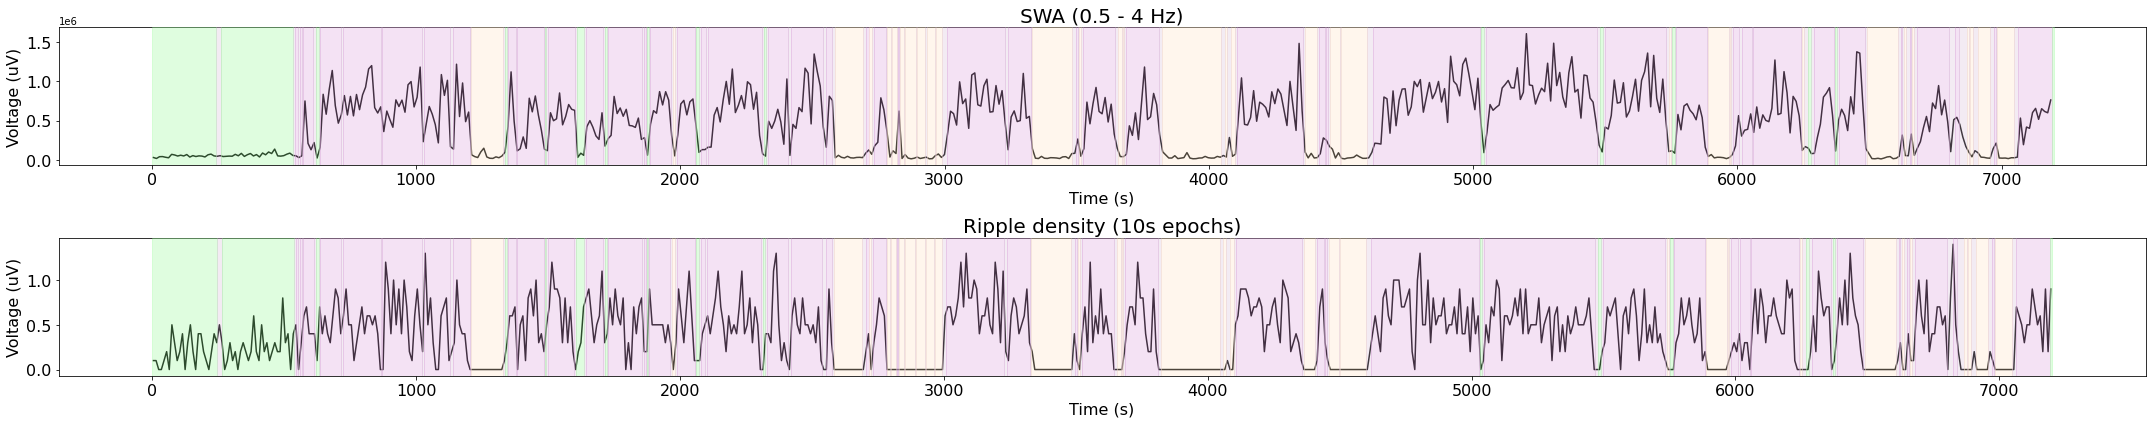

In [74]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 6))
plot_time_series(spg_times, swa, ax=ax1, title="SWA (0.5 - 4 Hz)")
plot_hypnogram_overlay(hypnogram, ax=ax1)
plot_time_series(epochs.center_time.to_numpy(), epochs.ripple_density.to_numpy(), ax=ax2, title="Ripple density (10s epochs)")
plot_hypnogram_overlay(hypnogram, ax=ax2)